# HW #7 Neural Networks (sample solution)

In this HW, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!) 10%

**Answer:** The Universal Approximation Theorem says that ***neural networks can estimate the output of any mathematical function, regardless of the number of inputs or ouputs it may have***. Even a neural network with a single hidden layer can provide pretty good estimates, but often a neural network with a larger hidden layer and/or more hidden layers will do even better. Since basically any classification or regresson problem can be modeled as a mathematical function, neural networks can, in theory, predict the outcome of basically any process pretty well. In practice, a neural network must have the right size and level of complexity to 'learn' a complex process, and it must be trained correctly.

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function." 10%

**Answer:** The first caveat: ***a neural network cannot made to be equal to any function, it can only approximate it***, which is just another way of saying it will provide a pretty good guess of what the function would output for a given input or set of inputs.

The second caveat is not obvious, but it's also not too important most of the time. It says that ***a neural network can only really approximate a continuous function, since neural networks themselves have continuous output***. If a function has undefined outputs in a given range, or if its output jumps wildly from point to point, then a neural network isn't guaranteed to deliver a decent approximation.

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate? 10%

Try playing around with the applets on the page to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

**Answer:** ***The weight $w$ must be very high.*** It can be easily shown that the derivative of a sigmoid function with respect to x is proportional to $w$. So to have a steep(large) slope, $w$ has to be large. 

The higher the $w$, the lower the bias $b$ must be so that the 'step' between output 0 and output 1 occurs in the range (0,1). The lower the bias, the higher the value of $x$ must be before the step occurs. 

This makes sense, since the purpose of the bias is to control the level of activation of a node given little or no input. The higher the weight, the lower the value of x must be in order to hit the 'step' and trigger activation of the node. This makes sense, since the node's inputs will have a greater linear effect on the activation of the node. (And we are here dealing with only positive inputs in the range (0,1).)

Since we're working with a sigmoid function with such a high weight that is an approximation of a step function, we can parameterize our hypothetical step function with $s$, which just gives the location of the step between 0 and 1. It is $s = -b/w$.

**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and where on the feedforward Neural Network is can the vaule of this function be collected? 10%

**Answer:** We were manipulating $h$ to approximate $f(x)$ with the inverse of the activation applied and without any bias term, i.e., $\sigma^{-1}.f()$. The value of this function is located right before the weighted signal got passed to the last sigmoid fucntion as shown in the diagram below. This other function is aldo the weighted output $Z$ of our hidden layer. So that once we apply a sigmoid activation function (and no bias) to $Z$ we will arrive at an approximation of $f(x)$, i.e., $\sigma (\sigma^{-1}.f(x)) = f(x)$.

<img alt="Problem4Graph.jpg" src="https://drive.google.com/uc?export=view&id=1b3932vrhUDlhQBGVlr6onM6bU4tsOt83">


**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score. 10%

**Answer:**

$h_1 = -1.2$

$h_2 = -1.6$

$h_3 = -0.3$

$h_4 = -1.0$

$h_5 = 1.0$

average deviation = .38

Note: Your result may vary but the best average deviation should be around 0.38.

**Problem 6**: Build the neural network from your work in Problem 5 here with MLPClassifier.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer? 
10%

There are ***1 input and 1 output***.    
There are ***10 neurons in the hidden layer***. 

**Problem 7(20%)**: Once you've built the neural network with the structure described in Problem 6, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and estimate the performance of your neural network using mean squared error.

Recall that mean squared error(MSE) is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.
* Use  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) for this work.
* Plot  $f(x)$ curve overlapped with the curve predicted by your trained Neural Networks for x between 0 and 1
* Try different learning rates   


In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
from sklearn import metrics

%matplotlib inline

In [0]:
# mlp_simple = MLPRegressor(hidden_layer_sizes=10, activation='logistics')

In [0]:
# functions to test different hidden layers and learning rates
def train_mlp(units, activation='relu', sgd=False, lr=0.001, batch_size=200,loss_curve=False):
    
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation)
    if sgd:
        mlp.set_params(solver='sgd', batch_size=batch_size, momentum=0.0, learning_rate_init=lr)
    
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test,y_test)
    y_predict=mlp.predict(x.reshape(-1,1))
    MSE = metrics.mean_squared_error(y, y_predict)
    comparing_plot(x,y,y_predict)
#     print(mlp.get_params())
    if loss_curve:
        return mlp.loss_curve_, accuracy
    
    return accuracy, MSE
def comparing_plot(x,y,y_predict):
    plt.plot(x,y,'r')
    plt.plot(x,y_predict)


def plot_hyper_param_plots(x, y, xlabel):
    best_x = x[np.argmax(y)]
    best_y = round(np.max(y), 2)
    plt.plot(x, y)
    plt.axvline(best_x, linestyle='dashed', color='red', 
                label= xlabel + ", {}, Test Accuracy: {}".format(best_x, best_y))
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy')
    plt.legend()

In [0]:
x = np.linspace(0, 1, 1000)
print(x[0:11])

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001]


In [0]:
y=0.2+0.4*x**2+0.3*x*np.sin(15*x)+0.05*np.cos(50*x)
print(y[0:11])

[0.25       0.2499423  0.24976934 0.24948161 0.24907985 0.24856516
 0.24793892 0.2472028  0.24635878 0.24540914 0.24435641]


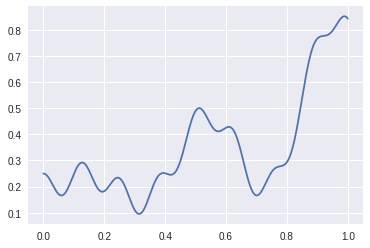

In [0]:
plt.plot(x,y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.2)

MSE with one hidden layer (10 hidden neurons): 0.0218


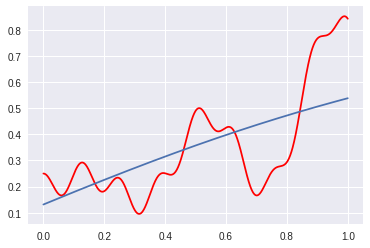

In [0]:
accuracy, MSE =train_mlp(10, activation='tanh')
print("MSE with one hidden layer (10 hidden neurons): %.4f" % MSE)

Let's try different learning rates from 0.001 to 2.

MSE with one hidden layer (10 hidden neurons) and learning rate as 0.001 : 0.0300
MSE with one hidden layer (10 hidden neurons) and learning rate as 0.183 : 0.0273
MSE with one hidden layer (10 hidden neurons) and learning rate as 0.364 : 0.0322
MSE with one hidden layer (10 hidden neurons) and learning rate as 0.546 : 0.0245
MSE with one hidden layer (10 hidden neurons) and learning rate as 0.728 : 0.0220
MSE with one hidden layer (10 hidden neurons) and learning rate as 0.910 : 0.0236
MSE with one hidden layer (10 hidden neurons) and learning rate as 1.091 : 0.0200
MSE with one hidden layer (10 hidden neurons) and learning rate as 1.273 : 0.0208
MSE with one hidden layer (10 hidden neurons) and learning rate as 1.455 : 0.0225
MSE with one hidden layer (10 hidden neurons) and learning rate as 1.637 : 0.0250
MSE with one hidden layer (10 hidden neurons) and learning rate as 1.818 : 0.0243
MSE with one hidden layer (10 hidden neurons) and learning rate as 2.000 : 0.0255


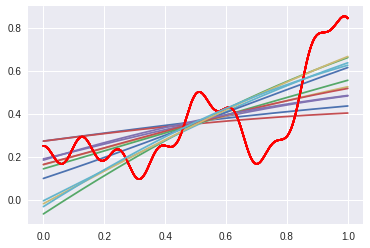

In [0]:
learning_rates = np.linspace(0.001, 2, 12)
for k in learning_rates:
    accuracy, MSE =train_mlp(10, activation='tanh',lr=k)
    print("MSE with one hidden layer (10 hidden neurons) and learning rate as %.3f : %.4f" % (k,MSE))

Note: Your result may vary at different runs due to randomly assigned initial weights assigned by the algorithm.

**Problem 8(20%)*: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?
* You try different number of hidden layers and different number of neurons in each hidden layer.
* Report your best Neural Network structure and the minimum MSE you can get.

After few trials, you may find the performance to be better around a certain number of neurons in the hidden layer. 600 appears to be a good number of neurons for one hidden layer. We will also use a preferred learning rate of 0.002 as demonstrated  in Problem 7.

Mean Square Error: 0.0188
Score: 0.3670


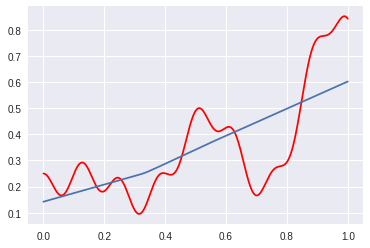

In [0]:
score, MSE=train_mlp((500), activation='relu',lr=0.002)
print('Mean Square Error: %.4f'% MSE)
print('Score: %.4f'% accuracy)

We now try out a range of different number of hidden layer neurons around 600 to see which one gives the optimal result.

Units: 500, Accuracy: 0.5330377800481692
Units: 504, Accuracy: 0.5475466103359043
Units: 508, Accuracy: 0.5430239182327945
Units: 512, Accuracy: 0.5758138000460762
Units: 516, Accuracy: 0.5499962559885188
Units: 520, Accuracy: 0.5636134011474392
Units: 524, Accuracy: 0.5431646075940251
Units: 528, Accuracy: 0.5575265877441308
Units: 532, Accuracy: 0.5288838413340538
Units: 536, Accuracy: 0.5647096710516342
Units: 540, Accuracy: 0.5428687912971351
Units: 544, Accuracy: 0.546774604948322
Units: 548, Accuracy: 0.5551703213022732
Units: 553, Accuracy: 0.543094716390966
Units: 557, Accuracy: 0.5351388590639296
Units: 561, Accuracy: 0.5468629643111531
Units: 565, Accuracy: 0.5402853195734156
Units: 569, Accuracy: 0.5419497477879928
Units: 573, Accuracy: 0.5409479909656573
Units: 577, Accuracy: 0.5444117366102048
Units: 581, Accuracy: 0.5464251727258136
Units: 585, Accuracy: 0.5381403998176695
Units: 589, Accuracy: 0.5454216158171235
Units: 593, Accuracy: 0.5612166103971129
Units: 597, Accura

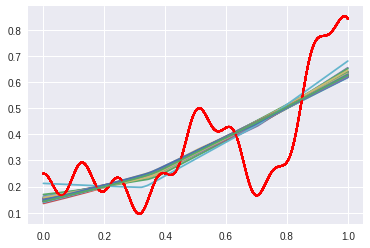

In [0]:
num_hidden_units = np.linspace(500, 700, 50).astype('int')
all_test_accuracy = []
for units in num_hidden_units: 
    test_accuracy, MSE = train_mlp((units,),lr=0.002)
    print ("Units: {}, Accuracy: {}".format(units, test_accuracy))
    all_test_accuracy.append(test_accuracy)

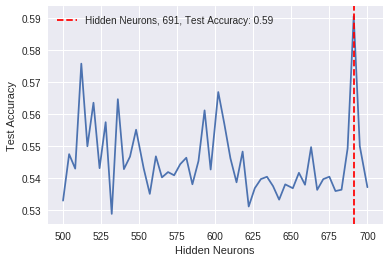

In [0]:
plot_hyper_param_plots(num_hidden_units, all_test_accuracy, 'Hidden Neurons')

Depth of the Network: 1, Test Accuracy: 0.541858,MSE: 0.017712
Depth of the Network: 2, Test Accuracy: 0.771545,MSE: 0.007840
Depth of the Network: 3, Test Accuracy: 0.954205,MSE: 0.001688
Depth of the Network: 4, Test Accuracy: 0.975148,MSE: 0.001112
Depth of the Network: 5, Test Accuracy: 0.982573,MSE: 0.000717
Depth of the Network: 6, Test Accuracy: 0.979150,MSE: 0.000761
Depth of the Network: 7, Test Accuracy: 0.976254,MSE: 0.000792
Depth of the Network: 8, Test Accuracy: 0.982280,MSE: 0.000762
Depth of the Network: 9, Test Accuracy: 0.981826,MSE: 0.000702
Depth of the Network: 10, Test Accuracy: 0.954251,MSE: 0.001688
Depth of the Network: 11, Test Accuracy: 0.977028,MSE: 0.000800
Depth of the Network: 12, Test Accuracy: 0.982869,MSE: 0.000584
Depth of the Network: 13, Test Accuracy: 0.964688,MSE: 0.001458
Depth of the Network: 14, Test Accuracy: 0.987331,MSE: 0.000540
Depth of the Network: 15, Test Accuracy: 0.979738,MSE: 0.000747


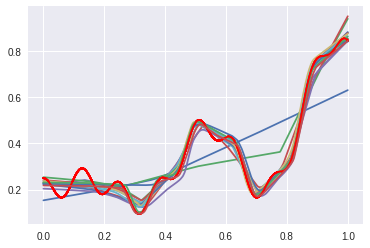

In [0]:
best_units = num_hidden_units[np.argmax(all_test_accuracy)]
best_depths = []

for depth in range(1, 16):
    accuracy, MSE = train_mlp((best_units,)*depth, lr=0.002)
    best_depths.append(accuracy)
    print ("Depth of the Network: {}, Test Accuracy: {:3f},MSE: {:4f}".format(depth, accuracy,MSE))

Your result may vary. A suggested optimal neural network will have 12 hidden layer with 553 neurons each. It achievs an MSE: 0.000045 and Accuracy as 0.999289,

Mean Square Error: 0.0012
Score: 0.9797


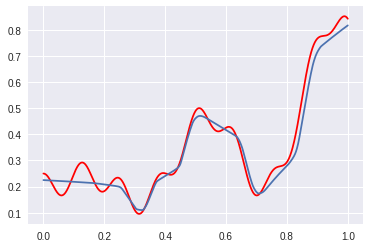

In [0]:
score, MSE=train_mlp((553,)*12, activation='relu',lr=0.002)
print('Mean Square Error: %.4f'% MSE)
print('Score: %.4f'% accuracy)